In [ ]:
import numpy as np
import cv2 as cv
from PIL import Image
from matplotlib import pyplot as plt
from scipy.ndimage import convolve

array([[[ 62, 228,  97],
        [ 62, 228,  97],
        [ 62, 228,  97],
        ...,
        [ 72, 240, 104],
        [ 72, 240, 104],
        [ 72, 240, 104]],

       [[ 62, 228,  97],
        [ 62, 228,  97],
        [ 62, 228,  97],
        ...,
        [ 72, 240, 104],
        [ 72, 240, 104],
        [ 72, 240, 104]],

       [[ 62, 228,  97],
        [ 62, 228,  97],
        [ 62, 228,  97],
        ...,
        [ 72, 240, 104],
        [ 72, 240, 104],
        [ 72, 240, 104]],

       ...,

       [[ 65, 240, 107],
        [ 66, 241, 108],
        [ 66, 241, 108],
        ...,
        [ 71, 247, 110],
        [ 71, 247, 110],
        [ 71, 247, 110]],

       [[ 65, 240, 107],
        [ 66, 241, 108],
        [ 66, 241, 108],
        ...,
        [ 69, 247, 110],
        [ 69, 247, 110],
        [ 69, 247, 110]],

       [[ 65, 240, 107],
        [ 66, 241, 108],
        [ 66, 241, 108],
        ...,
        [ 70, 248, 111],
        [ 69, 247, 110],
        [ 69, 247, 110]]], dtype=uint8)
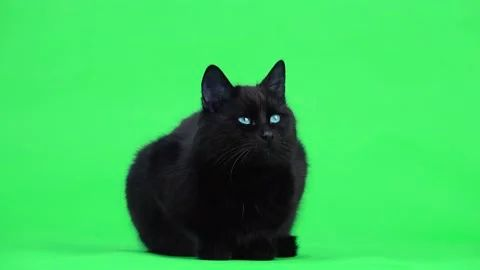

In [ ]:
original_img = cv.imread('/content/cat.jpg')
original_img

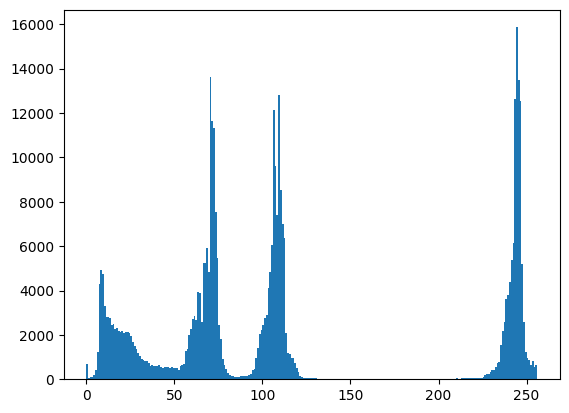

In [ ]:
plt.hist(original_img.ravel(),256,[0,256]); plt.show()

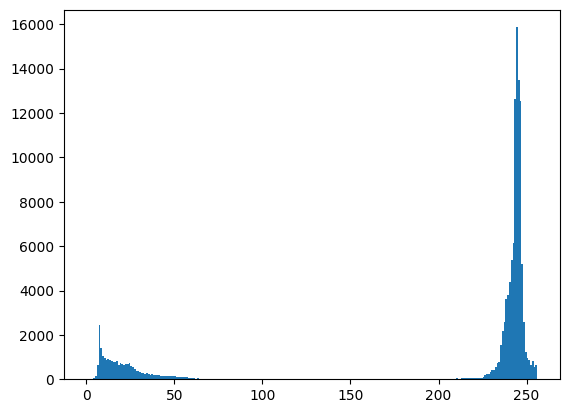

In [ ]:
green = original_img[:,:,1]
plt.hist(green.ravel(),256,[0,256]); plt.show()

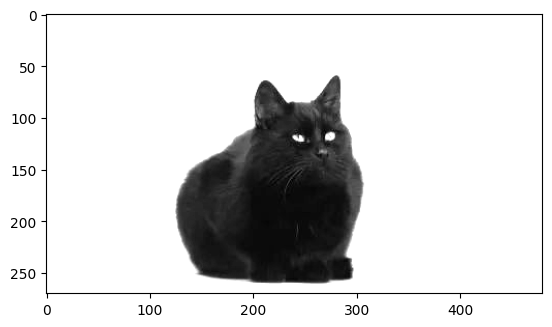

In [ ]:
#Cambiar el fondo de la imagen
green[green>150]=150
plt.imshow(green, cmap='gray')
plt.show()

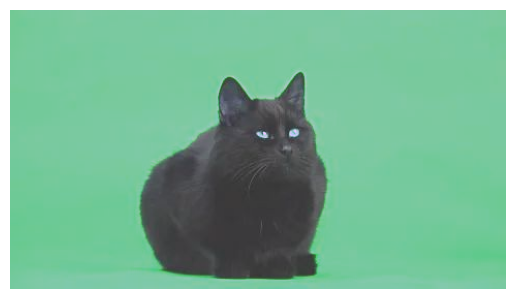

In [ ]:
#Cambiar brillo y contraste
img = np.array(original_img)
# Parámetros de ajuste
alfa = 1
beta = 0.2

img2 = (alfa * img) + beta * 255

img2 = np.clip(img2, 0, 255)

plt.imshow(img2.astype('uint8'), cmap='gray')
plt.axis('off')
plt.show()

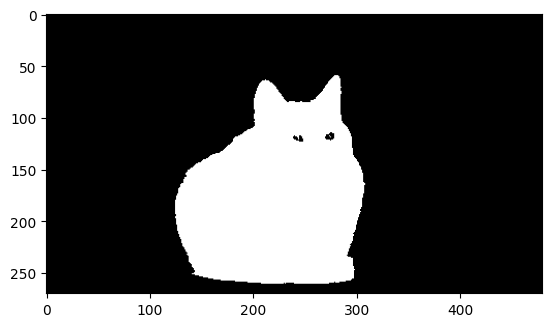

In [ ]:
original_img_pil = Image.fromarray(original_img)
# Convertir la imagen a escala de grises
gray_img = original_img_pil.convert('L')

# Aplicar un umbral para crear la máscara
threshold = 120  # Ajusta el umbral según sea necesario
alpha_mask = gray_img.point(lambda p: 0 if p > threshold else 255)

# Convertir la máscara a un array numpy y normalizar
alpha = np.array(alpha_mask) / 255.0

# Mostrar la máscara de alfa
plt.imshow(alpha, cmap='gray')
plt.show()

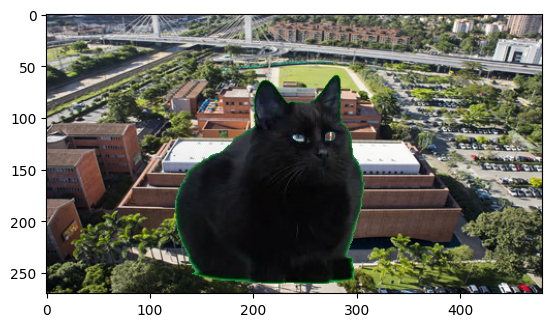

In [ ]:
background_img = Image.open('/content/ranking-universidades-eafit.jpg')  # Imagen de fondo B

# Convertir a formato numpy
F = np.array(original_img) / 255.0  # Normalizar a rango [0, 1]
alpha = np.array(alpha_mask.convert('L')) / 255.0  # Convertir a escala de grises y normalizar
B = np.array(background_img) / 255.0  # Normalizar a rango [0, 1]

# Asegurarse de que el fondo tenga las mismas dimensiones que la imagen original
B = np.array(Image.fromarray((B * 255).astype('uint8')).resize(F.shape[1::-1])).astype(np.float32) / 255.0

# Composición de la imagen C
C = (1 - alpha[:, :, np.newaxis]) * B + alpha[:, :, np.newaxis] * F

# Mostrar la imagen compuesta
plt.imshow((C * 255).astype('uint8'))
plt.show()

In [ ]:
!pip install scipy

In [ ]:
img_array = np.array(original_img)
# filtros Sobel
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])  # Filtro G_x
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # Filtro G_y

# Asegurarse de que la imagen esté en formato 2D
if img_array.ndim == 3 and img_array.shape[2] == 3:
    img_array = img_array[:, :, 0]

# Aplicar los filtros Sobel
G_x = convolve(img_array, sobel_x)
G_y = convolve(img_array, sobel_y)


# Calcular la magnitud del gradiente
G_magnitude = np.sqrt(G_x**2 + G_y**2)

# Normalizar
G_magnitude = (G_magnitude / np.max(G_magnitude)) * 255
G_magnitude = G_magnitude.astype(np.uint8)



(-0.5, 479.5, 269.5, -0.5)

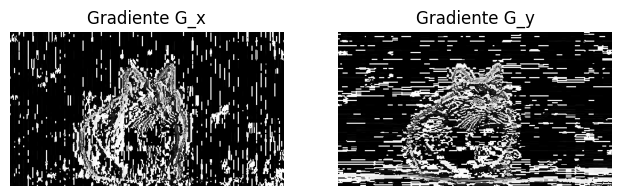

In [ ]:
# Mostrar los resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(G_x, cmap='gray')
plt.title('Gradiente G_x')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(G_y, cmap='gray')
plt.title('Gradiente G_y')
plt.axis('off')